# Principal Component Analysis with Cancer Data

In [119]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [54]:
cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancer_df.columns = ["ID","ClumpThickness","CellSize","CellShape","MarginalAdhesion","SingleEpithelialCellSize",
                     "BareNuclei","NormalNucleoli","BlandChromatin","Mitoses","Class"]
cancer_df.head(10)

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [55]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [56]:
cancer_df.drop('ID',axis=1,inplace=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [57]:
cancer_df.dtypes

ClumpThickness               int64
CellSize                     int64
CellShape                    int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
NormalNucleoli               int64
BlandChromatin               int64
Mitoses                      int64
Class                        int64
dtype: object

In [58]:
cancer_df.shape

(699, 10)

In [59]:
cancer_df.describe().T
# BareNuclei is missing from the below table which indicates that it has non-numeric data

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
CellSize,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
CellShape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
MarginalAdhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
SingleEpithelialCellSize,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
NormalNucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
BlandChromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [60]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df.isnull().sum()

ClumpThickness              0
CellSize                    0
CellShape                   0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
NormalNucleoli              0
BlandChromatin              0
Mitoses                     0
Class                       0
dtype: int64

In [61]:
cancer_df.isna().sum()

ClumpThickness              0
CellSize                    0
CellShape                   0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
NormalNucleoli              0
BlandChromatin              0
Mitoses                     0
Class                       0
dtype: int64

In [62]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
(cancer_df[['BareNuclei']] == '?').sum()

BareNuclei    16
dtype: int64

In [63]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [64]:
cancer_df['BareNuclei'].replace('?',np.NaN,inplace=True)

In [65]:
BareNuclei_median = cancer_df['BareNuclei'].median()

In [66]:
cancer_df['BareNuclei'].replace(np.NaN,BareNuclei_median,inplace=True)

In [67]:
cancer_df['BareNuclei'] = cancer_df.BareNuclei.astype(int)

In [68]:
cancer_df.dtypes

ClumpThickness              int64
CellSize                    int64
CellShape                   int64
MarginalAdhesion            int64
SingleEpithelialCellSize    int64
BareNuclei                  int32
NormalNucleoli              int64
BlandChromatin              int64
Mitoses                     int64
Class                       int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [69]:
# Check for correlation of variable
cancer_df.corr()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
CellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
CellShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MarginalAdhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
SingleEpithelialCellSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
NormalNucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
BlandChromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [70]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [71]:
#Let us check for pair plots

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


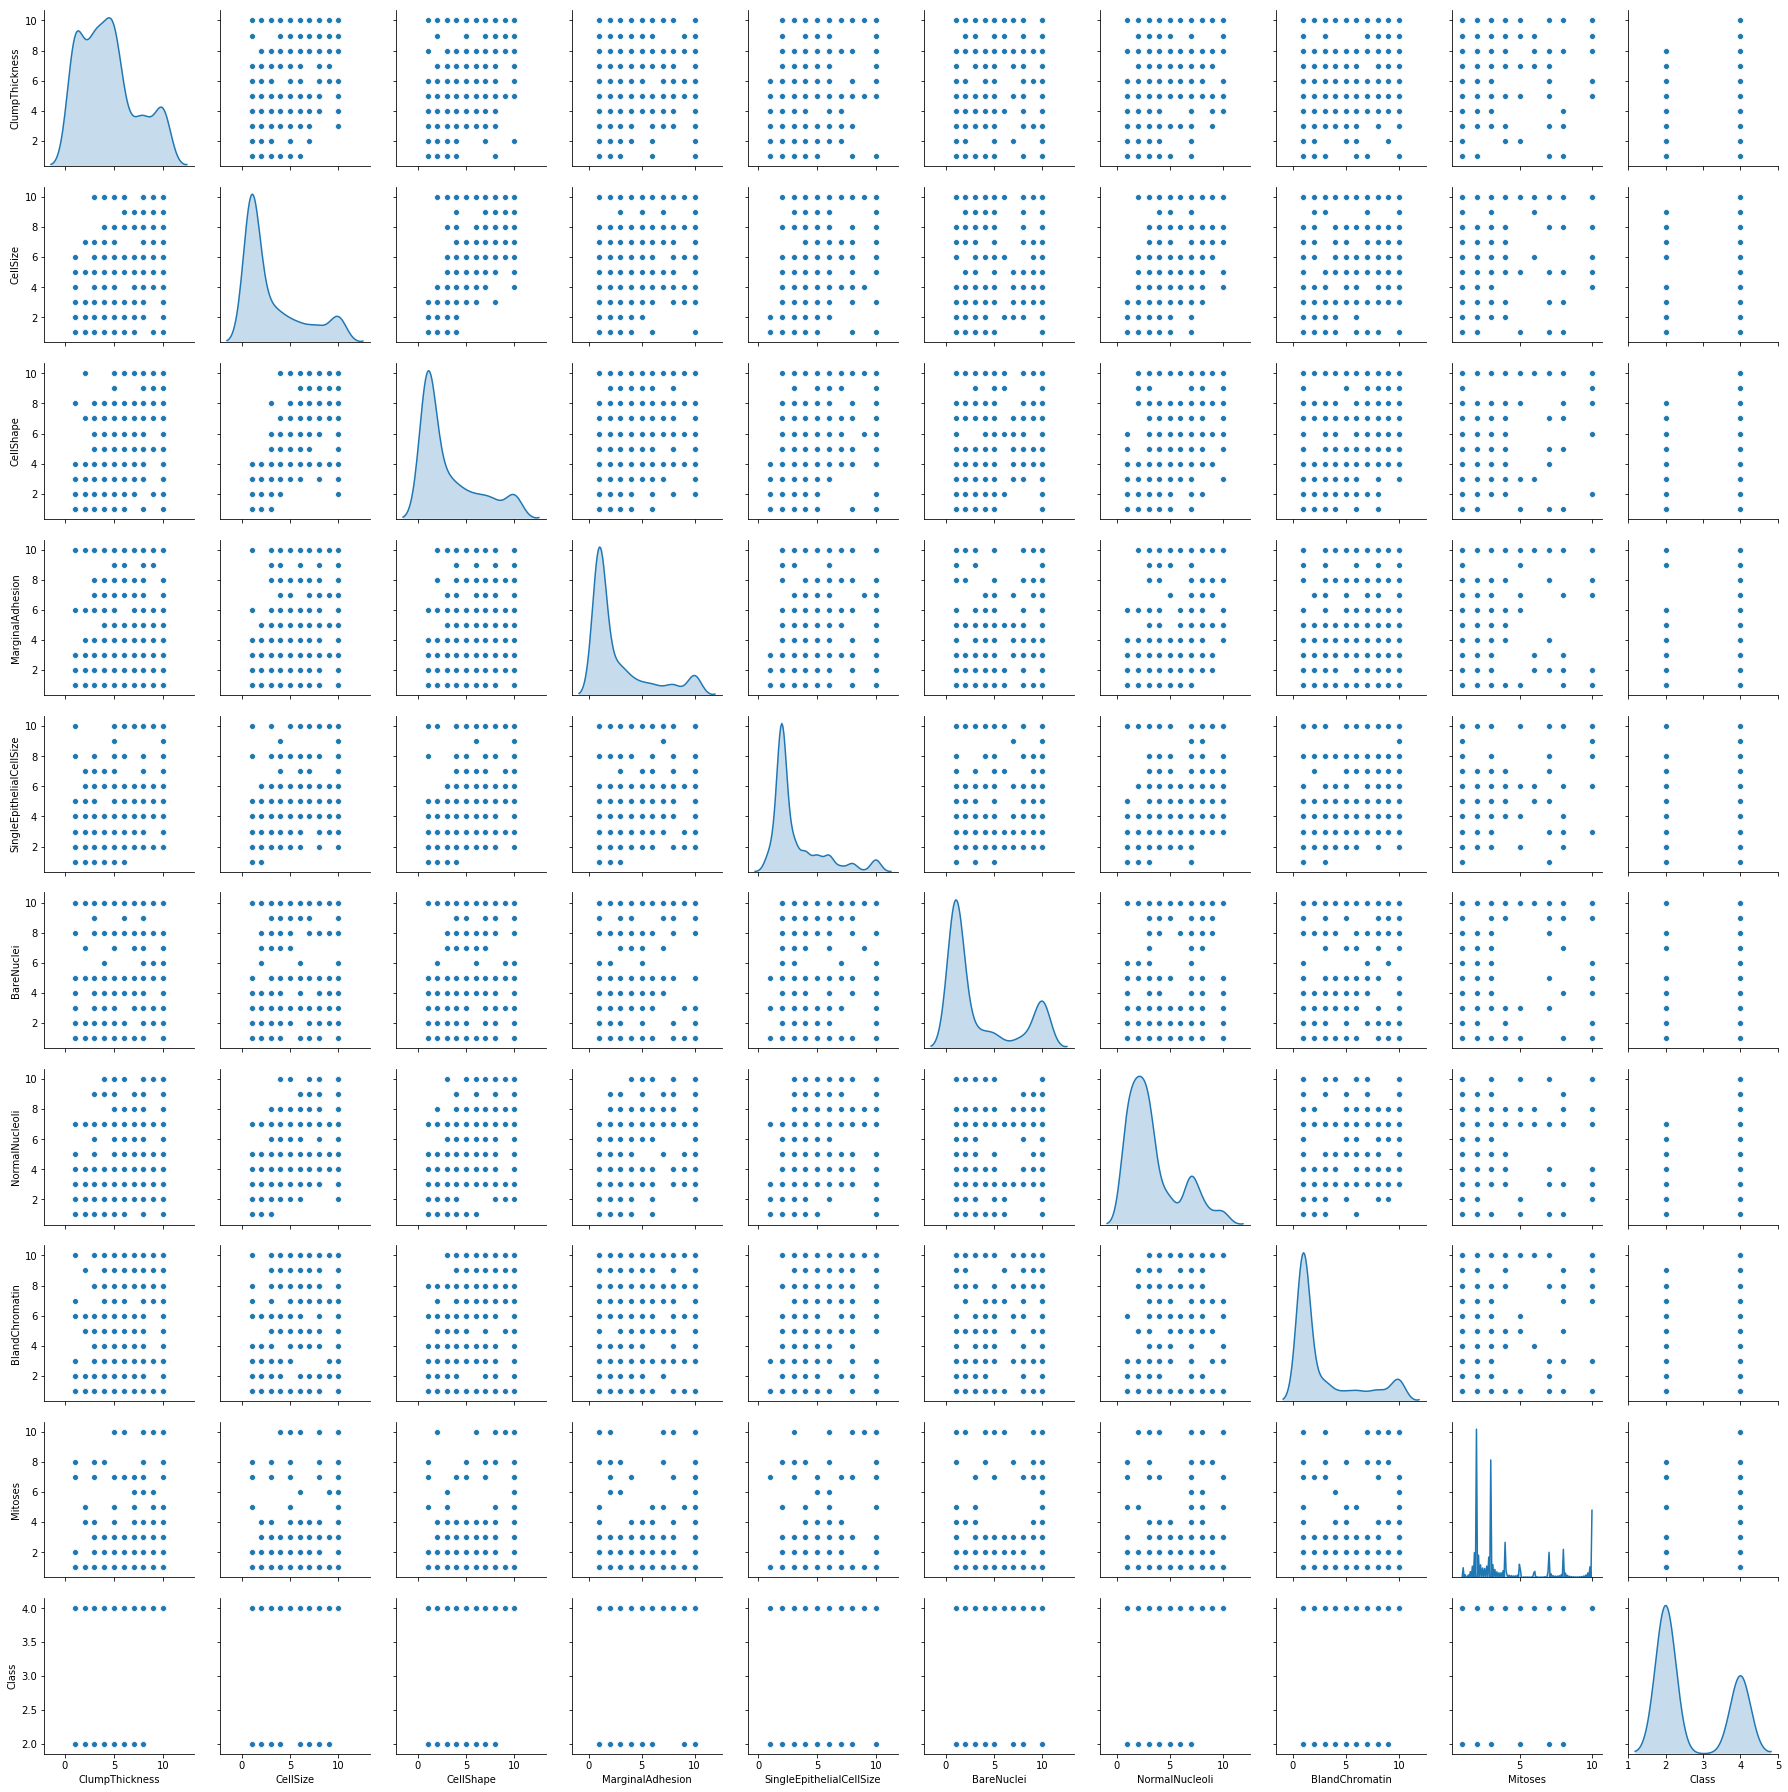

In [72]:
sns.pairplot(cancer_df, diag_kind='kde')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [73]:
X = cancer_df.drop("Class", axis=1)
y = cancer_df[["Class"]]
cancer_df.drop('Class',axis=1,inplace=True)

In [122]:
list(X)

['ClumpThickness',
 'CellSize',
 'CellShape',
 'MarginalAdhesion',
 'SingleEpithelialCellSize',
 'BareNuclei',
 'NormalNucleoli',
 'BlandChromatin',
 'Mitoses']

In [102]:
#train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=42)

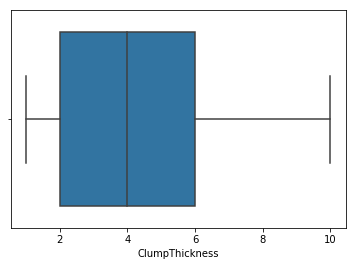

In [74]:
sns.boxplot(cancer_df['ClumpThickness'])

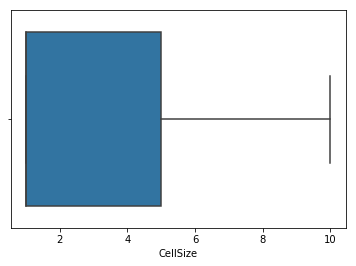

In [75]:
sns.boxplot(cancer_df['CellSize'])

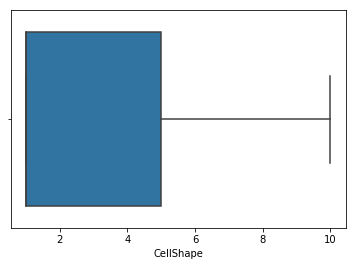

In [76]:
sns.boxplot(cancer_df['CellShape'])

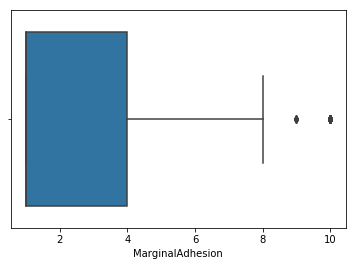

In [77]:
sns.boxplot(cancer_df['MarginalAdhesion'])

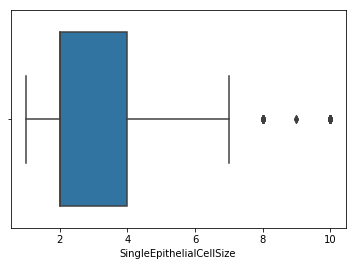

In [78]:
sns.boxplot(cancer_df['SingleEpithelialCellSize'])

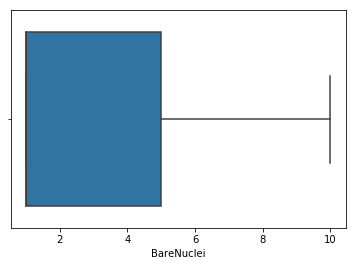

In [79]:
sns.boxplot(cancer_df['BareNuclei'])

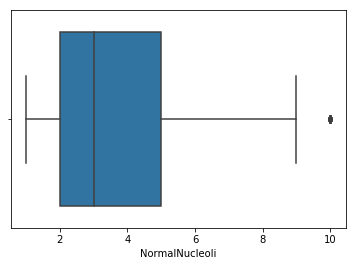

In [80]:
sns.boxplot(cancer_df['NormalNucleoli'])

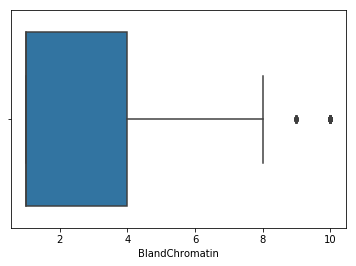

In [81]:
sns.boxplot(cancer_df['BlandChromatin'])

In [82]:
median = cancer_df.median()
std = cancer_df.std()
value = cancer_df

outliers = (value - median).abs() > 2*std

cancer_df[outliers] = np.nan
cancer_df.fillna(median, inplace=True)

In [0]:
# We could see most of the outliers are now removed.

In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer_df)
cancer_df = pd.DataFrame(scaled_data, index=cancer_df.index, columns=cancer_df.columns)
cancer_df

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,0.553223,-0.558083,-0.579738,-0.522524,-0.461223,-0.416629,0.032214,-0.449043,-0.328947
1,0.553223,1.276243,1.484288,2.553218,-0.461223,-0.416629,0.032214,0.233307,-0.328947
2,-0.388806,-0.558083,-0.579738,-0.522524,-0.461223,0.192626,0.032214,-0.449043,-0.328947
3,1.024238,-0.558083,-0.579738,-0.522524,0.340755,1.411135,0.032214,3.645059,-0.328947
4,0.082209,-0.558083,-0.579738,1.015347,-0.461223,-0.416629,0.032214,-0.449043,-0.328947
5,1.966268,-0.558083,-0.579738,-0.522524,-0.461223,-0.416629,0.032214,3.645059,-0.328947
6,-1.330836,-0.558083,-0.579738,-0.522524,-0.461223,-0.416629,0.032214,-0.449043,-0.328947
7,-0.859821,-0.558083,0.108270,-0.522524,-0.461223,-0.416629,0.032214,-0.449043,-0.328947
8,-0.859821,-0.558083,-0.579738,-0.522524,-0.461223,-0.416629,-1.093671,-0.449043,-0.328947
9,0.082209,0.053359,-0.579738,-0.522524,-0.461223,-0.416629,-0.530729,-0.449043,-0.328947


# Q6 Create a covariance matrix for identifying Principal components

In [89]:
# PCA
# Step 1 - Create covariance matrix

In [90]:
X_std =  scaler.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [88]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [91]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.898551899582241, array([-0.30280515, -0.38119012, -0.37757351, -0.33282286, -0.33639134,
       -0.33349748, -0.3459564 , -0.33584019, -0.22981766])), (0.7758830680807647, array([ 0.14602888,  0.04956364,  0.08526953,  0.04471887, -0.16403795,
        0.2477099 ,  0.22994199, -0.02502678, -0.90839421])), (0.539601554819918, array([-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
       -0.00367104,  0.19744944,  0.13164974, -0.09459348])), (0.4664055506212335, array([-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
       -0.5431767 , -0.00698988,  0.45537199, -0.23968608])), (0.38101775525038944, array([ 0.07192848, -0.13735749, -0.10469081,  0.03462797, -0.68258246,
       -0.1275059 ,  0.25519148,  0.63180293,  0.1316273 ])), (0.30405591873920346, array([ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
       -0.57486596, -0.31459721, -0.03841564, -0.14360708])), (0.29609473619399845, array([-0.00131277,  0.21521315,  0.14204379, -

In [92]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

In [94]:
var_explained

[0.6544570379762203,
 0.08608589755529701,
 0.05986995473919927,
 0.0517487004186331,
 0.042274740607975154,
 0.03373565908122141,
 0.032852348730473824,
 0.029106580311492932,
 0.009869080579486803]

In [95]:
cum_var_exp

array([0.65445704, 0.74054294, 0.80041289, 0.85216159, 0.89443633,
       0.92817199, 0.96102434, 0.99013092, 1.        ])

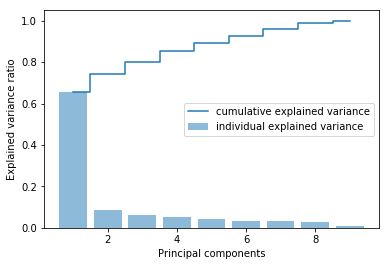

In [115]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [96]:
#utilizing PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [126]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [127]:
pca.components_

array([[ 0.30280515,  0.38119012,  0.37757351,  0.33282286,  0.33639134,
         0.33349748,  0.3459564 ,  0.33584019,  0.22981766],
       [-0.14602888, -0.04956364, -0.08526953, -0.04471887,  0.16403795,
        -0.2477099 , -0.22994199,  0.02502678,  0.90839421],
       [-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
        -0.00367104,  0.19744944,  0.13164974, -0.09459348],
       [-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
        -0.5431767 , -0.00698988,  0.45537199, -0.23968608],
       [-0.07192848,  0.13735749,  0.10469081, -0.03462797,  0.68258246,
         0.1275059 , -0.25519148, -0.63180293, -0.1316273 ],
       [ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
        -0.57486596, -0.31459721, -0.03841564, -0.14360708],
       [-0.00131277,  0.21521315,  0.14204379, -0.0861038 , -0.18337725,
        -0.41187463,  0.67301535, -0.50406321,  0.12567403]])

In [128]:
pca.n_components_ 
# number of attributes reduced from 9 to 7

7

In [129]:
X_pca = pca.transform(X_std)
#train_set = pca.transform(train_set)
#test_set = pca.transform(test_set)

In [130]:
X_pca_df = pd.DataFrame(X_pca)

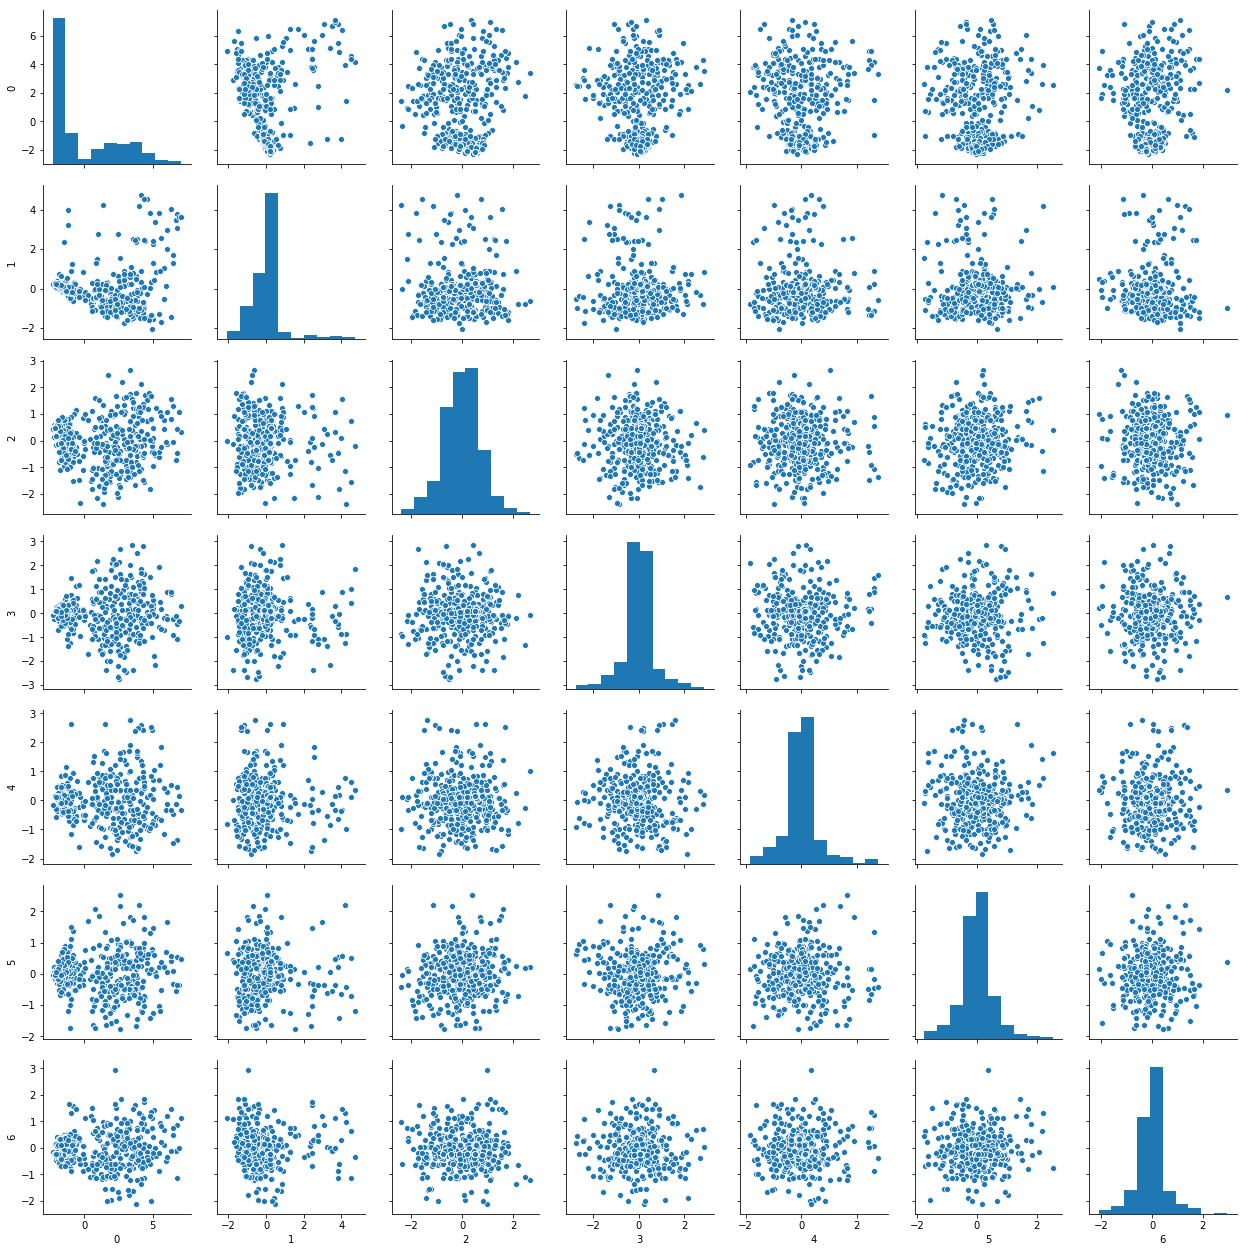

In [131]:
sns.pairplot(X_pca_df)

# Q10 Find correlation between components and features

In [132]:
corr_df = pd.DataFrame(pca.components_,columns=list(X))
corr_df

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,0.302805,0.381190,0.377574,0.332823,0.336391,0.333497,0.345956,0.335840,0.229818
1,-0.146029,-0.049564,-0.085270,-0.044719,0.164038,-0.247710,-0.229942,0.025027,0.908394
2,-0.862217,0.019092,-0.034584,0.421448,0.110104,-0.003671,0.197449,0.131650,-0.094593
3,-0.088217,0.202639,0.175155,-0.470317,0.373329,-0.543177,-0.006990,0.455372,-0.239686
4,-0.071928,0.137357,0.104691,-0.034628,0.682582,0.127506,-0.255191,-0.631803,-0.131627
5,0.269469,0.100098,0.032002,0.680834,-0.035598,-0.574866,-0.314597,-0.038416,-0.143607
6,-0.001313,0.215213,0.142044,-0.086104,-0.183377,-0.411875,0.673015,-0.504063,0.125674


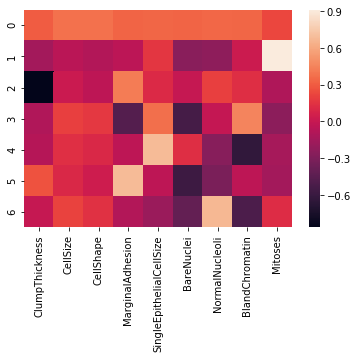

In [133]:
sns.heatmap(corr_df)

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [134]:
jokes_df = pd.read_csv("jokes.csv",nrows=200)
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [135]:
#Extarcted only 200 rows only
jokes_df = jokes_df.drop(['NumJokes'],axis=1)

In [136]:
jokes_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [137]:
jokes_df.columns = range(100)

In [138]:
jokes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [139]:
jokes_df = jokes_df.replace(99,0)

In [140]:
jokes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [141]:
ratings_diff = scaler.fit_transform(jokes_df)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [142]:
ratings_diff = pd.DataFrame(ratings_diff)

In [144]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


In [145]:
ratings_mean = ratings_diff.mean(axis=1)

In [156]:
ratings_mean.sort_values(ascending=False).head(10)

94     1.033314
44     1.014903
86     0.984949
159    0.974522
109    0.898831
13     0.879180
17     0.774465
73     0.767659
46     0.748349
153    0.693850
dtype: float64